In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load data
data = pd.read_csv("adult 3.csv")


In [23]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:

print(data.columns)
print(data.info())
print(data.describe())


Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12 

In [ ]:

data.replace('?', np.nan, inplace=True)

data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)


In [26]:
print(data['income'].value_counts(normalize=True))


income
<=50K    0.752156
>50K     0.247844
Name: proportion, dtype: float64


In [27]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

for col in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le


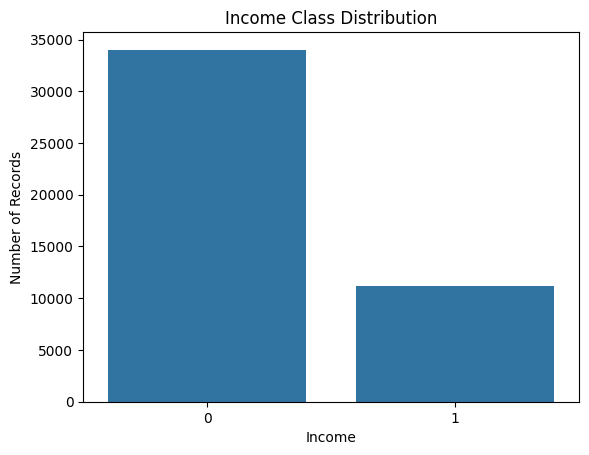

In [28]:
sns.countplot(x='income', data=data)
plt.title("Income Class Distribution")
plt.xlabel("Income")
plt.ylabel("Number of Records")
plt.show()


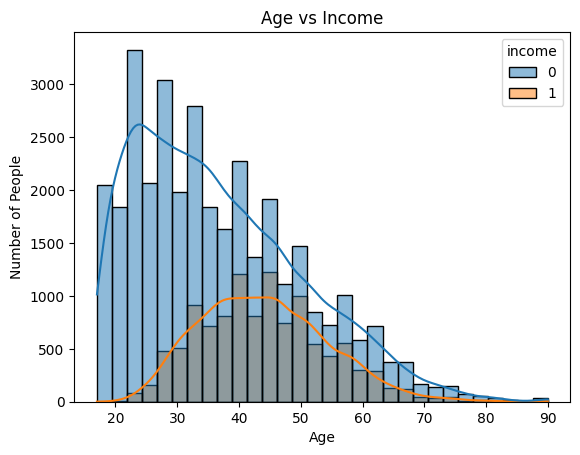

In [29]:
sns.histplot(data=data, x='age', hue='income', bins=30, kde=True)
plt.title("Age vs Income")
plt.xlabel("Age")
plt.ylabel("Number of People")
plt.show()


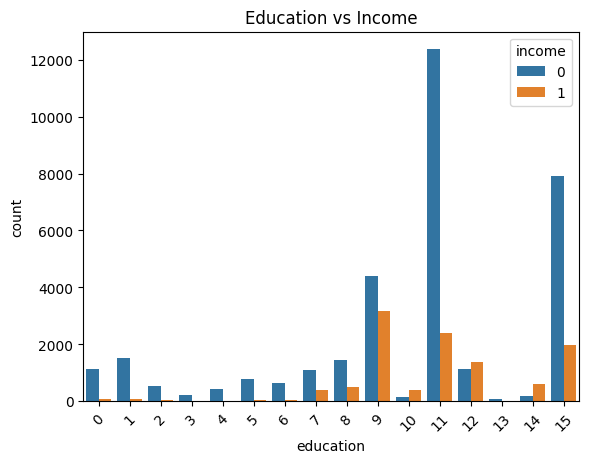

In [30]:
sns.countplot(x='education', hue='income', data=data)
plt.xticks(rotation=45)
plt.title("Education vs Income")
plt.show()


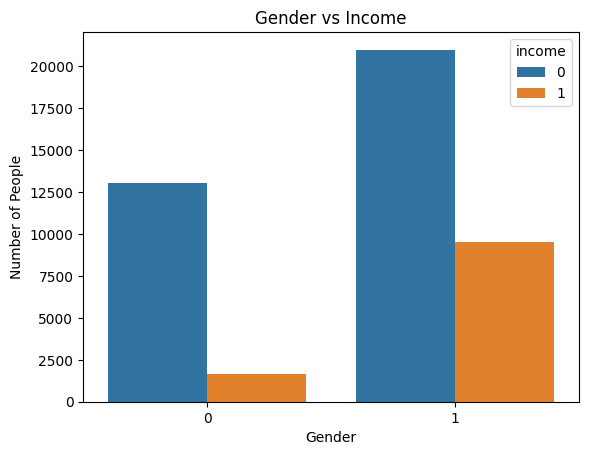

In [31]:
sns.countplot(x='gender', hue='income', data=data)
plt.title("Gender vs Income")
plt.xlabel("Gender")
plt.ylabel("Number of People")
plt.show()


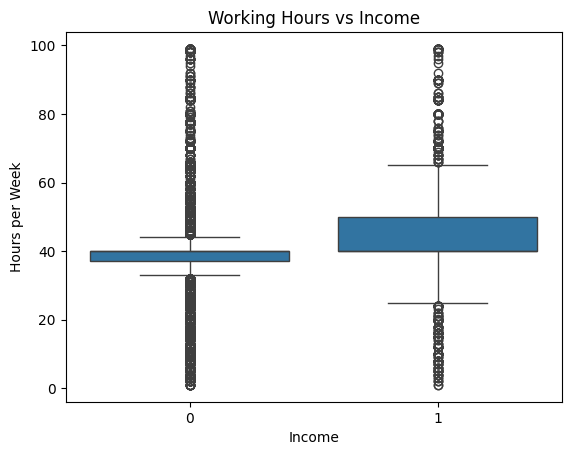

In [32]:
sns.boxplot(x='income', y='hours-per-week', data=data)
plt.title("Working Hours vs Income")
plt.xlabel("Income")
plt.ylabel("Hours per Week")
plt.show()


In [33]:
data_encoded = pd.get_dummies(data, drop_first=True)
data_encoded.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,1,7,4,6,3,2,1,0,0,40,38,0
1,38,2,89814,11,9,2,4,0,4,1,0,0,50,38,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,38,1
3,44,2,160323,15,10,2,6,0,2,1,7688,0,40,38,1
4,34,2,198693,0,6,4,7,1,4,1,0,0,30,38,0


In [34]:
x = data_encoded.drop('income', axis=1)
y = data_encoded['income']


In [35]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_s = scaler.fit_transform(x_train)
x_test_s = scaler.transform(x_test)


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(max_iter=1000)
lr.fit(x_train_s, y_train)
y_pred = lr.predict(x_test_s)

accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)


Logistic Regression Accuracy: 0.8211166390270868


In [38]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(x_train_s, y_train)
y_pred1 = rf.predict(x_test_s)

rf_accuracy = accuracy_score(y_test, y_pred1)
print("Random Forest Accuracy:", rf_accuracy)


Random Forest Accuracy: 0.8557213930348259


In [39]:
from sklearn.metrics import classification_report

print("Logistic Regression Report:\n", classification_report(y_test, y_pred))
print("Random Forest Report:\n", classification_report(y_test, y_pred1))


Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      6842
           1       0.71      0.45      0.55      2203

    accuracy                           0.82      9045
   macro avg       0.78      0.69      0.72      9045
weighted avg       0.81      0.82      0.81      9045

Random Forest Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91      6842
           1       0.74      0.62      0.68      2203

    accuracy                           0.86      9045
   macro avg       0.81      0.78      0.79      9045
weighted avg       0.85      0.86      0.85      9045



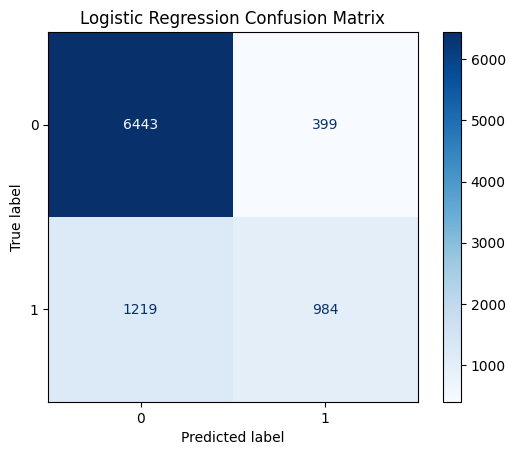

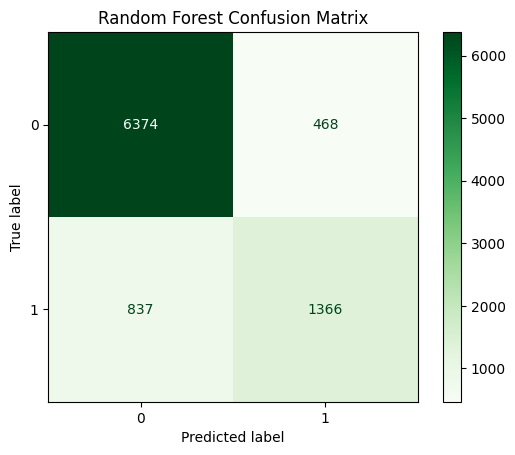

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.show()

ConfusionMatrixDisplay.from_predictions(y_test, y_pred1, cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.show()


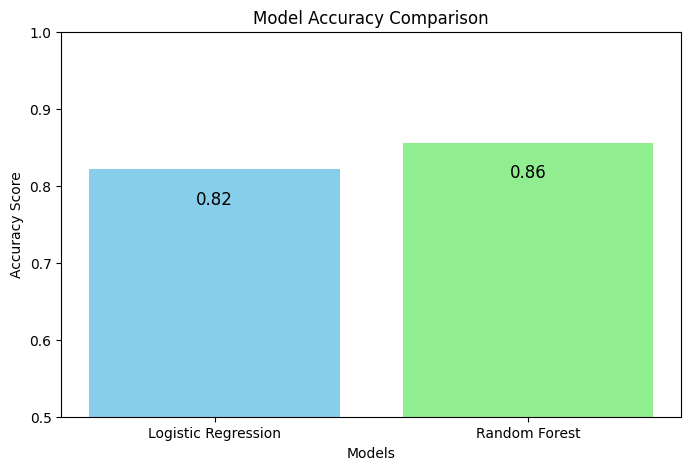

In [41]:
models = ['Logistic Regression', 'Random Forest']
accuracies = [accuracy, rf_accuracy]

plt.figure(figsize=(8, 5))
bars = plt.bar(models, accuracies, color=['skyblue', 'lightgreen'])
plt.ylim(0.5, 1.0)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy Score')
plt.xlabel('Models')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height - 0.05,
             f'{height:.2f}', ha='center', va='bottom', color='black', fontsize=12)

plt.show()


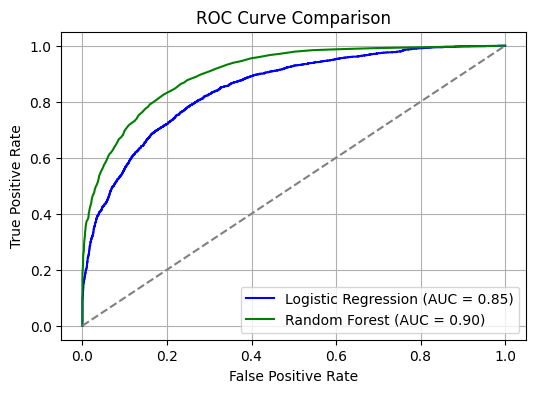

In [42]:
from sklearn.metrics import roc_curve, roc_auc_score

lr_probs = lr.predict_proba(x_test_s)[:, 1]
rf_probs = rf.predict_proba(x_test_s)[:, 1]

lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

lr_auc = roc_auc_score(y_test, lr_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

plt.figure(figsize=(6, 4))
plt.plot(lr_fpr, lr_tpr, label=f"Logistic Regression (AUC = {lr_auc:.2f})", color='blue')
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {rf_auc:.2f})", color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import joblib

df = pd.read_csv("adult 3.csv")

features = ['age', 'education', 'marital-status', 'occupation', 'hours-per-week', 'gender']
target = 'income'

X = df[features]
y = df[target]

# Define preprocessing
numeric_features = ['age', 'hours-per-week']
categorical_features = ['education', 'marital-status', 'occupation', 'gender']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])


clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf.fit(X_train, y_train)

joblib.dump(clf, 'model_pipeline.pkl')


y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
